<a href="https://colab.research.google.com/github/Luna-Yumiki/Interaction-between-AIs/blob/main/Luna_Yumiki_Info_5002_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages
!pip install diffusers==0.10.2 transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.1/503.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.0 MB/s eta 0:00:00


In [ ]:
# Import required packages
import matplotlib.pyplot as plt
from PIL import Image
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

plot function to help draw pictures

In [ ]:
def plot_images(images):
    # Set figure size
    plt.figure(figsize=(20, 20))
    # Loop through each image
    for i in range(len(images)):
        # Subplot setup
        ax = plt.subplot(1, len(images), i + 1)
        # Plot each image
        plt.imshow(images[i])
        # Do not show axis
        plt.axis("off")

fetch stable diffusion (pre-trained model)
use scheduler to optimize the model pipeline

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

*Use GPU cuda

In [ ]:
num_images = 4

prompt = ["a lovely cat looks like a dog"] * num_images

generator = torch.Generator("cuda").manual_seed(1024)

imagesCatLikeDog = pipe(prompt, height=512, width=512, num_inference_steps=50, generator=generator).images

  0%|          | 0/50 [00:00<?, ?it/s]

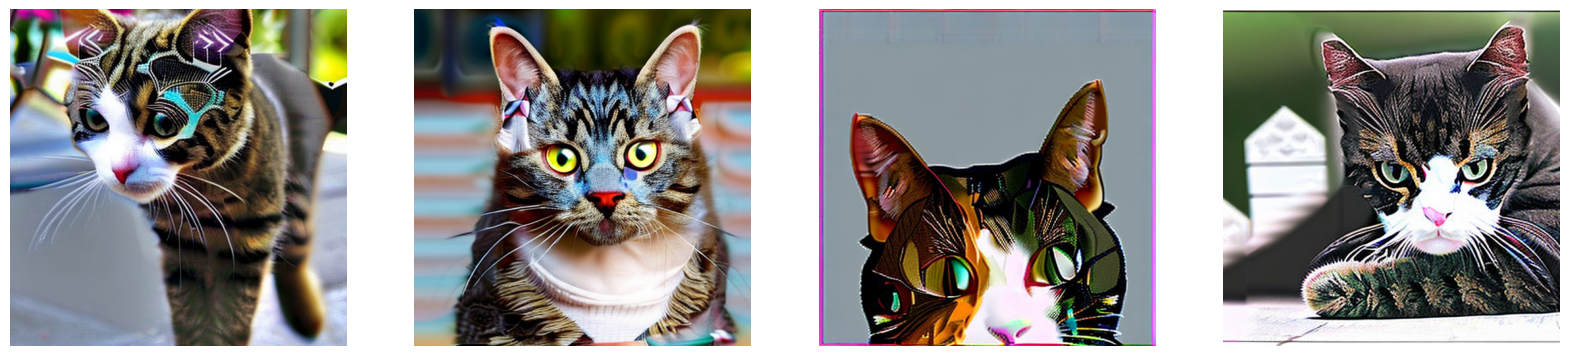

In [ ]:
plot_images(imagesCatLikeDog)

In [ ]:
num_images = 4

prompt = ["a lovely dog looks like a cat"] * num_images

# generator = torch.Generator("cuda").manual_seed(1024)

imagesDogLikeCat = pipe(prompt, height=512, width=512, num_inference_steps=50, generator=generator).images

  0%|          | 0/50 [00:00<?, ?it/s]

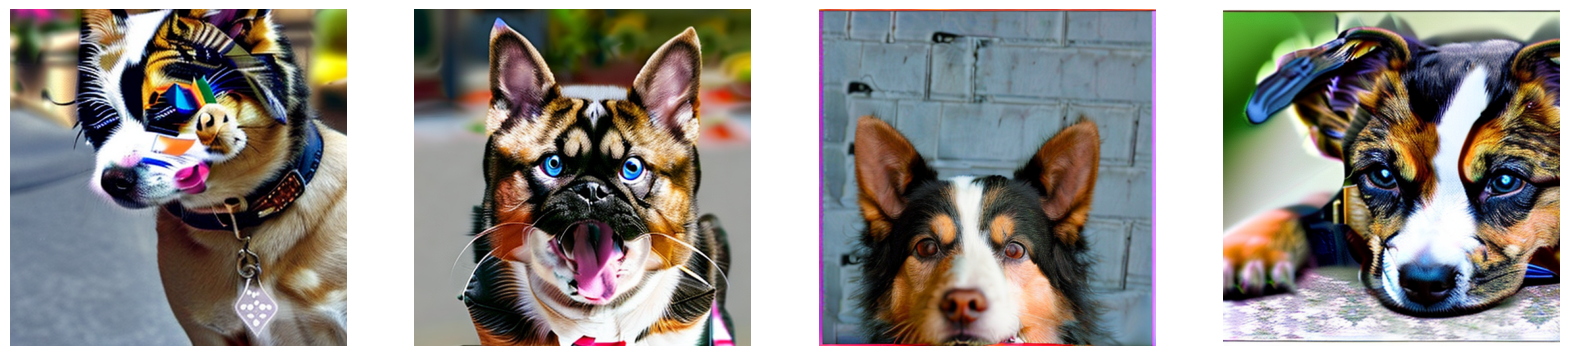

In [ ]:
plot_images(imagesDogLikeCat)

In [ ]:
num_images = 4

prompt = ["a lovely dog"] * num_images

# generator = torch.Generator("cuda").manual_seed(1024)

imagesDogs = pipe(prompt, height=512, width=512, num_inference_steps=50, generator=generator).images

  0%|          | 0/50 [00:00<?, ?it/s]

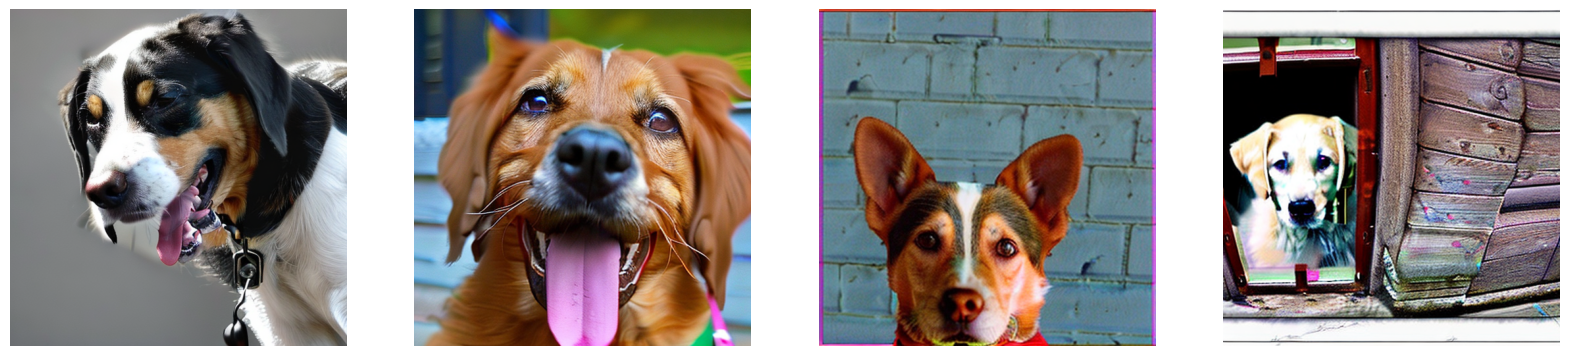

In [ ]:
plot_images(imagesDogs)

In [ ]:
num_images = 4

prompt = ["a lovely cat"] * num_images

# generator = torch.Generator("cuda").manual_seed(1024)

imagesCats = pipe(prompt, height=512, width=512, num_inference_steps=50, generator=generator).images

  0%|          | 0/50 [00:00<?, ?it/s]

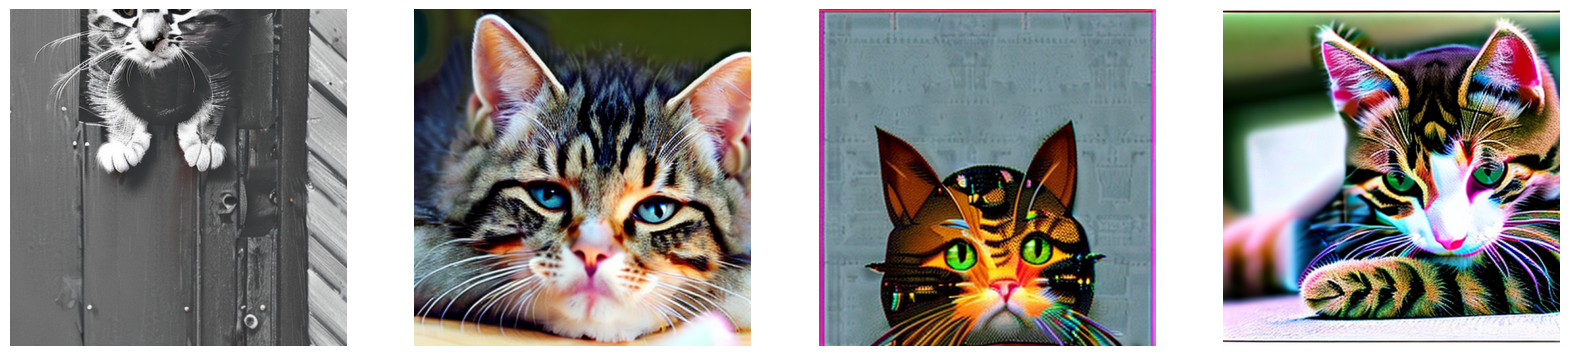

In [ ]:
plot_images(imagesCats)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory
import os
#os.makedirs("drive/My Drive/contents/cv")
os.chdir("drive/My Drive/contents/cv")

Mounted at /content/drive


In [ ]:
# Save images
imageIdx = 0
for idx, image in enumerate(imagesCatLikeDog):
  imagesCatLikeDog[idx].save("info_5002_{}.png".format(imageIdx))
  imageIdx = imageIdx + 1
for idx, image in enumerate(imagesDogLikeCat):
  imagesDogLikeCat[idx].save("info_5002_{}.png".format(imageIdx))
  imageIdx = imageIdx + 1
for idx, image in enumerate(imagesCats):
  imagesCats[idx].save("info_5002_{}.png".format(imageIdx))
  imageIdx = imageIdx + 1
for idx, image in enumerate(imagesDogs):
  imagesDogs[idx].save("info_5002_{}.png".format(imageIdx))
  imageIdx = imageIdx + 1